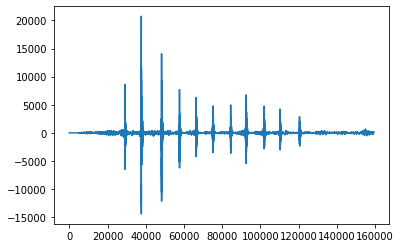

In [ ]:
import scipy.io.wavfile as wavfile
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal

s_rate, signal = wavfile.read("/content/untitled.wav")

plt.plot( signal)


# Framing

In [ ]:
def framing(signal, s_rate, frame_sizeSec, overlap_size ,windowType):
  datalen = len(signal)
  frame_size = round((frame_sizeSec )* (s_rate))
  framNum = round(datalen / (s_rate * frame_sizeSec))
  print(framNum)

  shift = 0
  if overlap_size != 0:
        shift = round(overlap_size * s_rate)
        framNum = np.ceil((datalen -frame_size) / shift)
  matrix = np.empty(( int(framNum), int(frame_size) ))
  Emat = np.empty(( int(framNum), int(frame_size) ))

  for i in range(round(framNum)):
        if i == 0:
            matrix[i] = signal[frame_size*i :frame_size*(i+1)]
            Emat[i] = (matrix[i])** 2
        else:
            matrix[i] = signal[(frame_size*i) - shift*i :(frame_size*(i+1)) - shift*i]
            Emat[i] = (matrix[i])** 2

        Emat[i] += Emat[i]

  if windowType == 'hamming':
    matrix[i]+=np.hamming(frame_size)
  elif  windowType == 'hanning':
    matrix[i]+=np.hanning(frame_size)

  print(len(matrix))
  print(len(Emat))
  plt.plot( Emat)

  return matrix

241
480
480


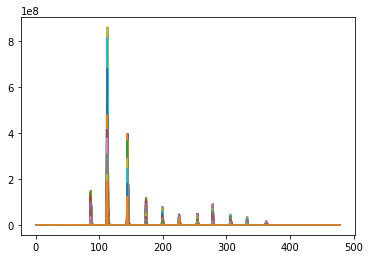

In [ ]:
framing_matrix = framing(signal, s_rate,0.015 ,0.5*0.015, "hanning")

In [ ]:
framing_matrix

array([[   0.        ,    0.        ,    0.        , ...,    1.        ,
          -1.        ,    1.        ],
       [  -3.        ,    3.        ,   -2.        , ...,    1.        ,
          -1.        ,   -1.        ],
       [   1.        ,    0.        ,    2.        , ...,    3.        ,
          -3.        ,    1.        ],
       ...,
       [  37.        ,   49.        ,   57.        , ...,   55.        ,
          45.        ,   49.        ],
       [ -17.        ,  -13.        ,  -10.        , ..., -127.        ,
        -128.        , -130.        ],
       [  44.08      ,   41.08002078,   37.08008312, ...,  150.08008312,
         146.08002078,  159.08      ]])

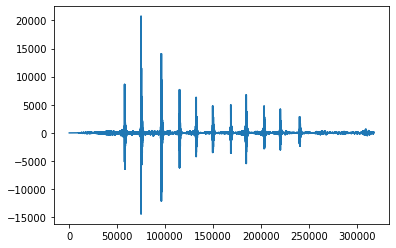

In [ ]:
rFramingMatrix = framing_matrix.flatten()
plt.plot(rFramingMatrix)

# Energy

In [ ]:
def EnergyCalc(frm):
    en = 0
    for i in frm:
        en +=(i**2)
    return en

In [ ]:
energy = np.zeros(framing_matrix.shape[0])
for i in range(framing_matrix.shape[0]):
    energy[i] = EnergyCalc(framing_matrix[i])

print(len(energy))
print(energy)

480
[3.08600000e+03 3.03600000e+03 3.29600000e+03 3.39800000e+03
 3.48600000e+03 4.31200000e+03 6.85600000e+03 8.96100000e+03
 7.69500000e+03 6.56100000e+03 8.42500000e+03 1.02610000e+04
 2.19560000e+04 3.81660000e+04 9.04600000e+04 1.42958000e+05
 2.06082000e+05 2.13128000e+05 4.26243000e+05 7.05197000e+05
 7.19876000e+05 6.06068000e+05 7.83595000e+05 1.08989300e+06
 1.12632600e+06 1.24656200e+06 1.00501300e+06 1.76401500e+06
 2.29442000e+06 2.10822400e+06 2.24728700e+06 1.79548900e+06
 1.56981200e+06 2.19741700e+06 2.00868800e+06 9.45108000e+05
 6.54007000e+05 5.21534000e+05 5.94535000e+05 8.02698000e+05
 1.06090100e+06 1.06772500e+06 1.27310800e+06 1.49519600e+06
 1.47390800e+06 2.32242400e+06 2.21175800e+06 1.77160900e+06
 2.67204500e+06 3.74550800e+06 4.90950300e+06 3.92547800e+06
 2.29661600e+06 2.41551300e+06 3.00658000e+06 3.82971400e+06
 5.37032500e+06 9.38869900e+06 1.21554050e+07 1.73386310e+07
 2.26670950e+07 1.72760950e+07 1.91546370e+07 2.26072440e+07
 1.80693770e+07 1.62

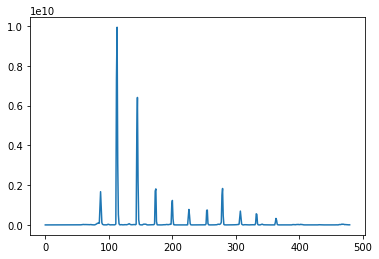

In [ ]:
plt.plot(energy)

# Zero Crossing


In [ ]:
def zeroCrossing(frm):
    m = 0
    for i in range(1,frm.size):
        if (frm[i]*frm[i-1]) <=0:
            m += 1
    return m

In [ ]:
zeroCross = np.zeros(framing_matrix.shape[0])
for i in range(framing_matrix.shape[0]):
    zeroCross[i] = zeroCrossing(framing_matrix[i])
print(zeroCross)

[637. 627. 599. 561. 536. 497. 352. 230. 284. 387. 342. 254. 212. 153.
  86.  45.  33.  34.  23.  37.  57.  32.  28.  37.  37.  32.  52.  43.
  22.  33.  33.  34.  42.  44.  47.  52.  47.  43.  52.  58.  38.  36.
  38.  34.  37.  38.  42.  48.  45.  43.  43.  40.  44.  41.  37.  31.
  30.  26.  23.  24.  19.  24.  22.  19.  33.  31.  20.  21.  19.  20.
  24.  13.  10.  26.  27.  33.  45.  34.  20.   8.   1.   1.   3.   3.
   1.  10.  23.  43.  40.  27.  23.  27.  34.  28.  32.  33.  35.  29.
  12.   5.   8.  21.  36.  26.  19.  27.  25.  29.  32.  23.  23.  26.
  40.  50.  41.  36.  40.  42.  34.  13.  21.  37.  32.  30.  33.  21.
  22.  28.  18.  11.   6.   7.   3.   8.   8.  21.  21.  19.  29.  17.
   7.  30.  39.  32.  45.  45.  48.  58.  60.  59.  56.  51.  53.  32.
   5.   1.   1.   1.   1.   6.  23.  70.  86.  50.  43.  57.  44.  21.
  12.  16.  22.  29.  46.  61.  60.  77.  84.  55.  53.  75.  96.  88.
  75.  54.  29.  15.   8.   8.  15.  15.   1.   1.   8.  19.  17.   9.
   3. 

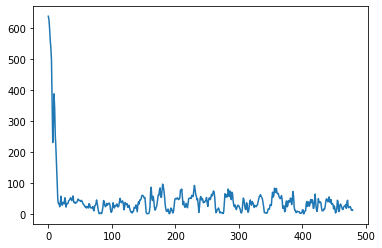

In [ ]:
plt.plot(zeroCross)